# Lance Stroll
<img src="https://www.formula1.com/content/fom-website/en/drivers/lance-stroll/_jcr_content/image.img.1920.medium.jpg/1641828817373.jpg" width="300">

### Team: Aston Martin

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lance-stroll/_jcr_content/helmet.img.png/1646824889978.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [2]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

str_laps <- lap_data %>%
            filter(driverId == 840)

raceId,n
<dbl>,<int>
1046,87
990,56
1011,56
1052,56
971,12
1045,2


`geom_smooth()` using formula 'y ~ x'



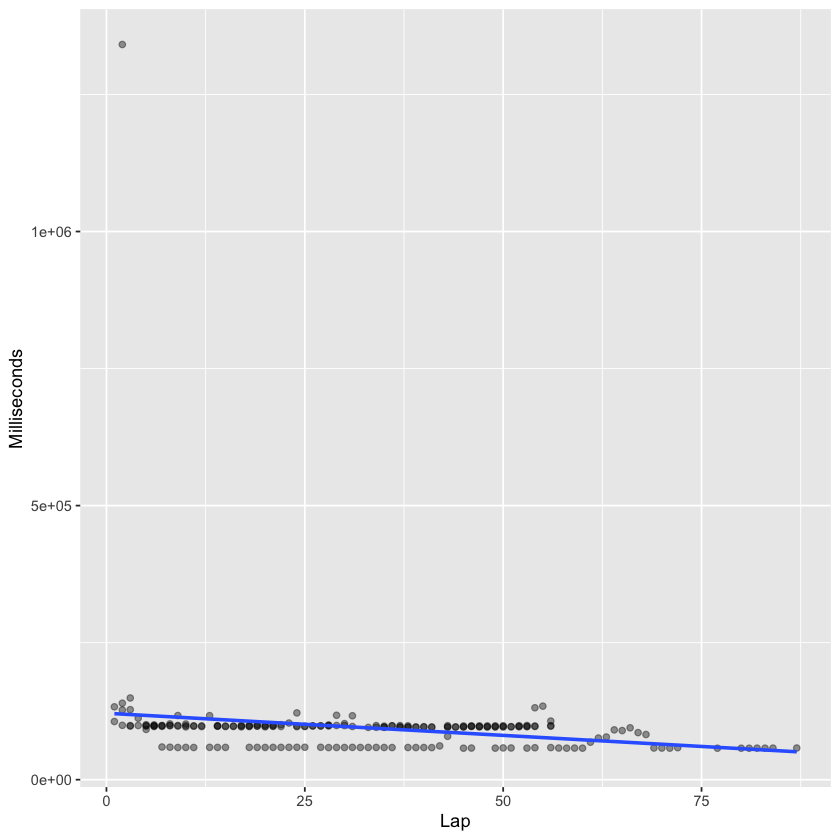

In [4]:
#1. BAHRAIN 

ls_bahrain <- str_laps %>%
                filter(raceId %in% bahrain_race_ID) 

ls_bahrain_clean <- ls_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ls_bahrain_clean
ls_bahrain_clean_ID <- ls_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_bahrain_races <- str_laps %>%
                    filter(raceId %in% ls_bahrain_clean_ID)

formulaone_split <- initial_split(ls_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1072,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



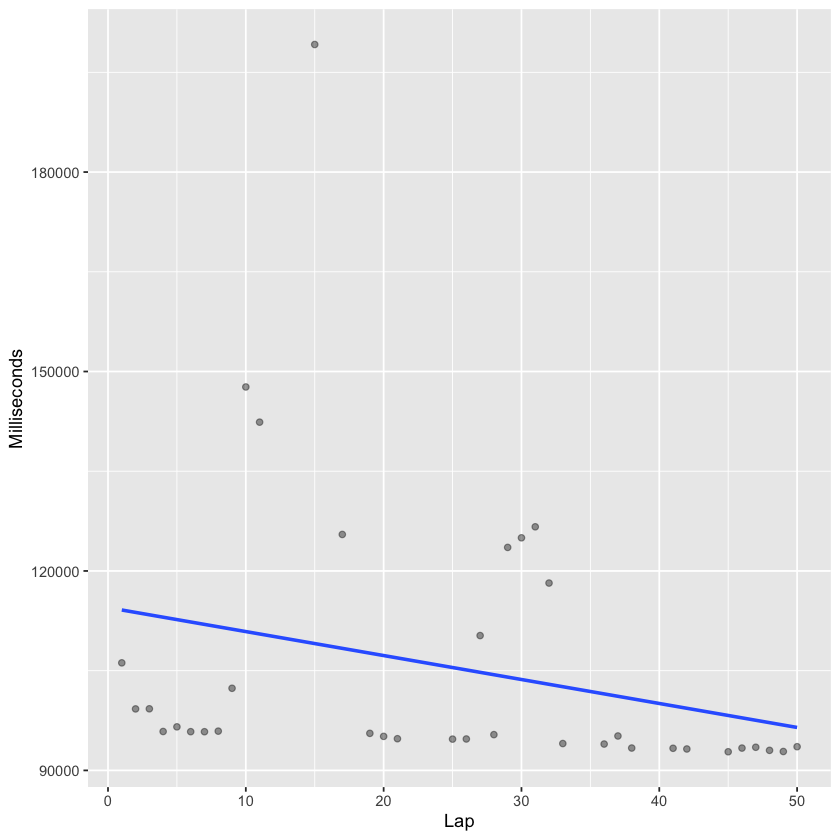

In [5]:
#2. Saudi Arabia

ls_saudi <- str_laps %>%
                filter(raceId %in% saudi_race_ID) 

ls_saudi_clean <- ls_saudi %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_saudi_clean
ls_saudi_clean_ID <- ls_saudi_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_saudi_races <- str_laps %>%
                    filter(raceId %in% ls_saudi_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(ls_saudi_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
989,58
1010,57
969,40


`geom_smooth()` using formula 'y ~ x'



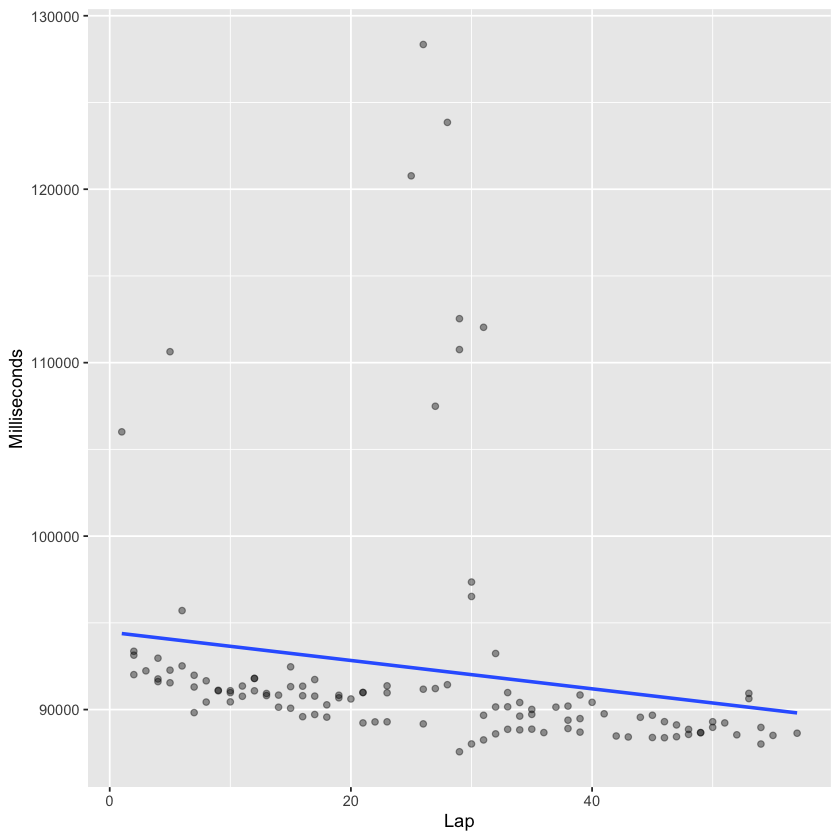

In [6]:
#3. Australia

ls_aus <- str_laps %>%
                filter(raceId %in% aus_race_ID) 

ls_aus_clean <- ls_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_aus_clean
ls_aus_clean_ID <- ls_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_aus_races <- str_laps %>%
                    filter(raceId %in% ls_aus_clean_ID)

formulaone_split <- initial_split(ls_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



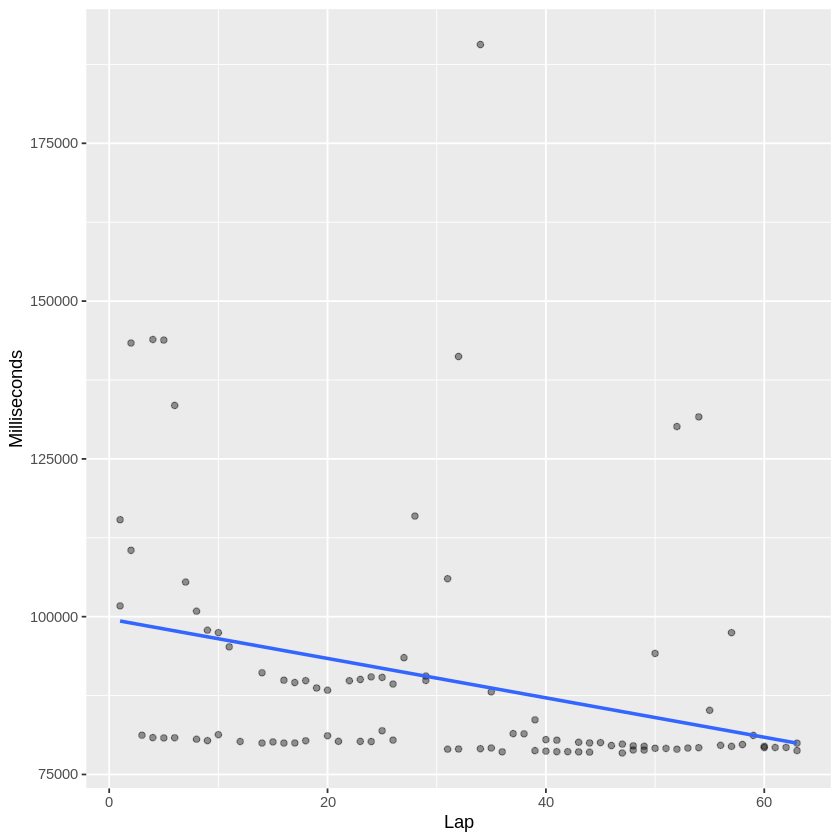

In [41]:
#4. Italy, Imola

ls_imola <- str_laps %>%
                filter(raceId %in% imola_race_ID) 

ls_imola_clean <- ls_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_imola_clean
ls_imola_clean_ID <- ls_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_imola_races <- str_laps %>%
                    filter(raceId %in% ls_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



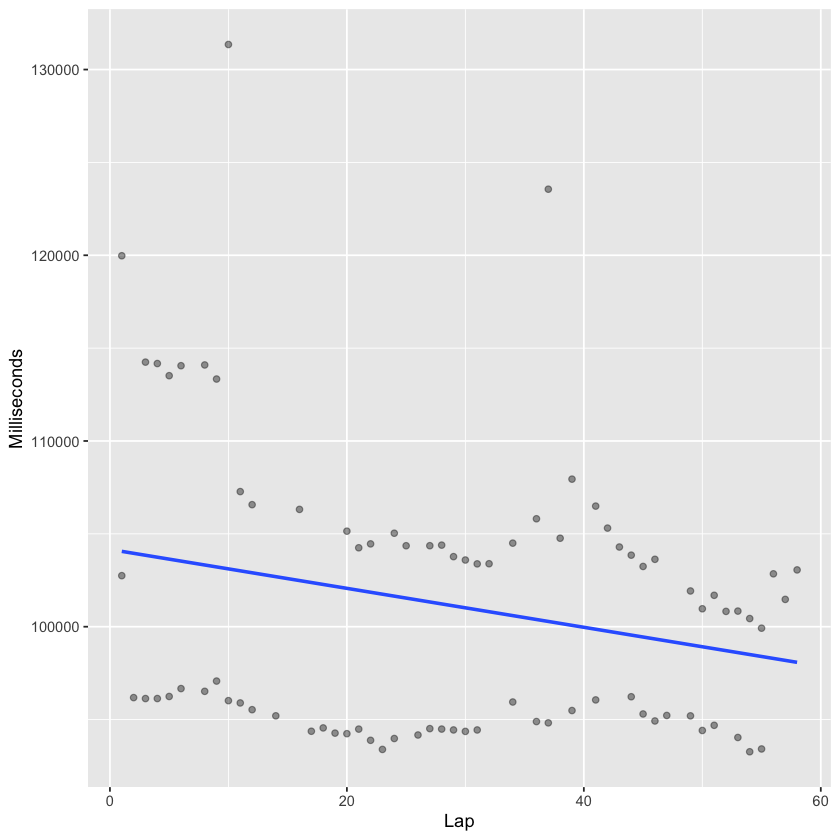

In [7]:
#5. Turkey (Replacing Miami)

ls_turkey <- str_laps %>%
                filter(raceId %in% turkey_race_ID) 

ls_turkey_clean <- ls_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_turkey_clean
ls_turkey_clean_ID <- ls_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_turkey_races <- str_laps %>%
                    filter(raceId %in% ls_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1036,65
1055,65
973,64
993,64
1014,44


`geom_smooth()` using formula 'y ~ x'



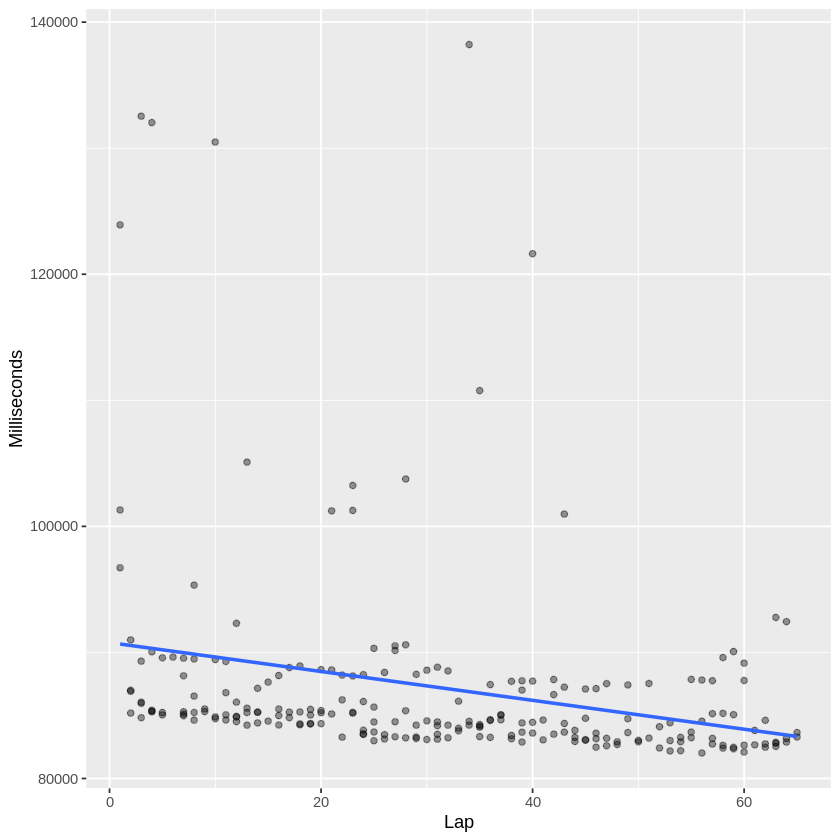

In [42]:
#6. Spain

ls_spain <- str_laps %>%
                filter(raceId %in% spain_race_ID) 

ls_spain_clean <- ls_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_spain_clean
ls_spain_clean_ID <- ls_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_spain_races <- str_laps %>%
                    filter(raceId %in% ls_spain_clean_ID)

formulaone_split <- initial_split(ls_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,77
1056,77
994,76
974,71


`geom_smooth()` using formula 'y ~ x'



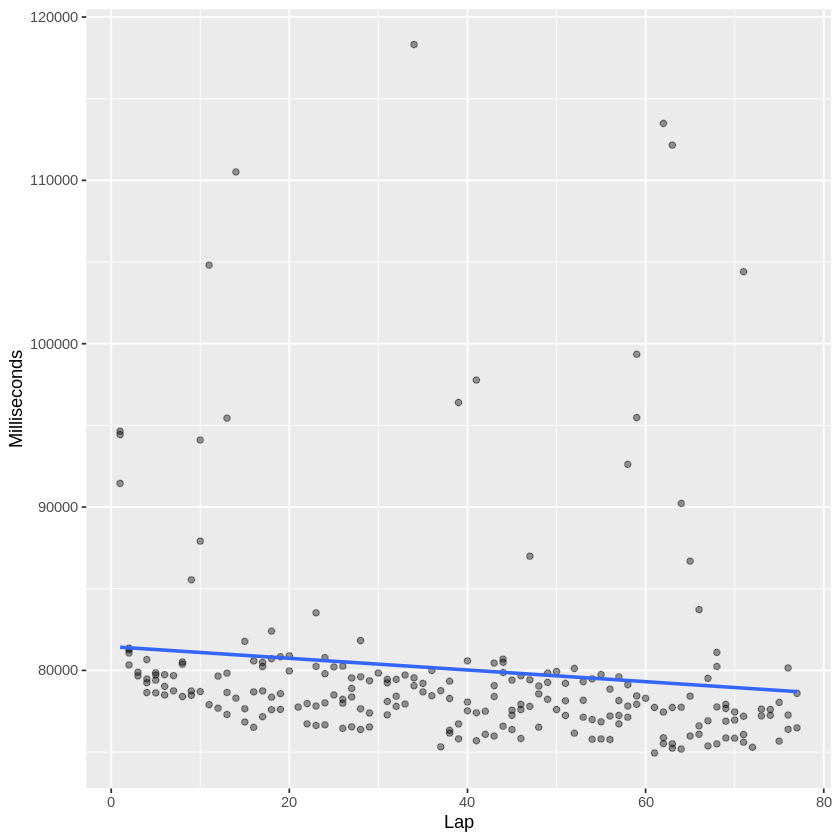

In [43]:
#7. Monaco

ls_monaco <- str_laps %>%
                filter(raceId %in% monaco_race_ID) 

ls_monaco_clean <- ls_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_monaco_clean
ls_monaco_clean_ID <- ls_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_monaco_races <- str_laps %>%
                    filter(raceId %in% ls_monaco_clean_ID)

formulaone_split <- initial_split(ls_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
976,51
992,51
1013,51
1057,29


`geom_smooth()` using formula 'y ~ x'



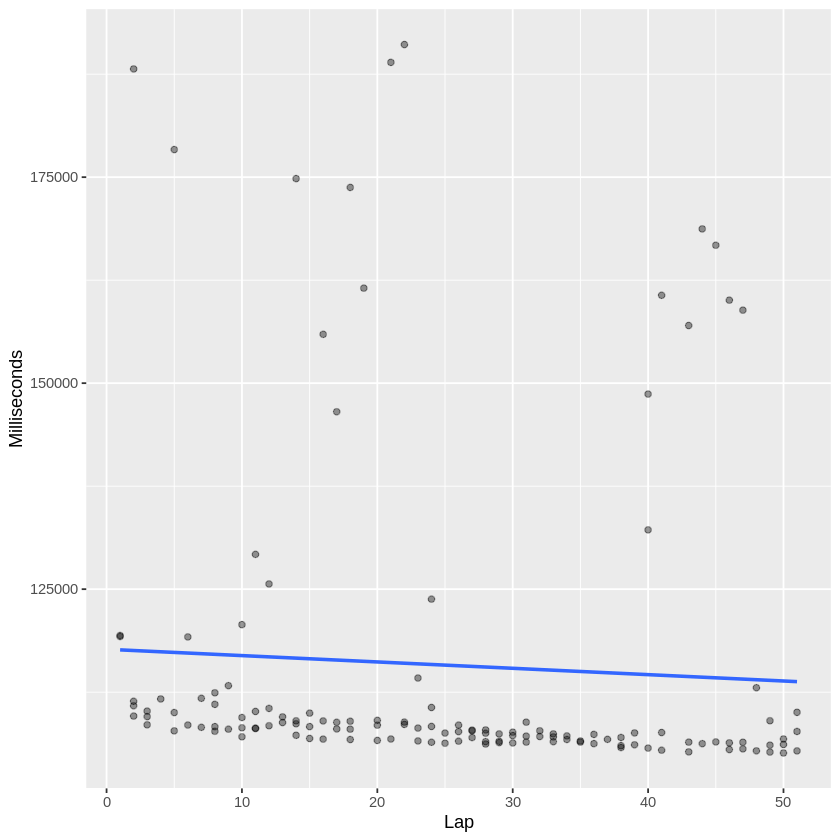

In [44]:
#8. Azerbaijan

ls_azerbaijan <- str_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

ls_azerbaijan_clean <- ls_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_azerbaijan_clean
ls_azerbaijan_clean_ID <- ls_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_azerbaijan_races <- str_laps %>%
                    filter(raceId %in% ls_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
975,69
1016,69


`geom_smooth()` using formula 'y ~ x'



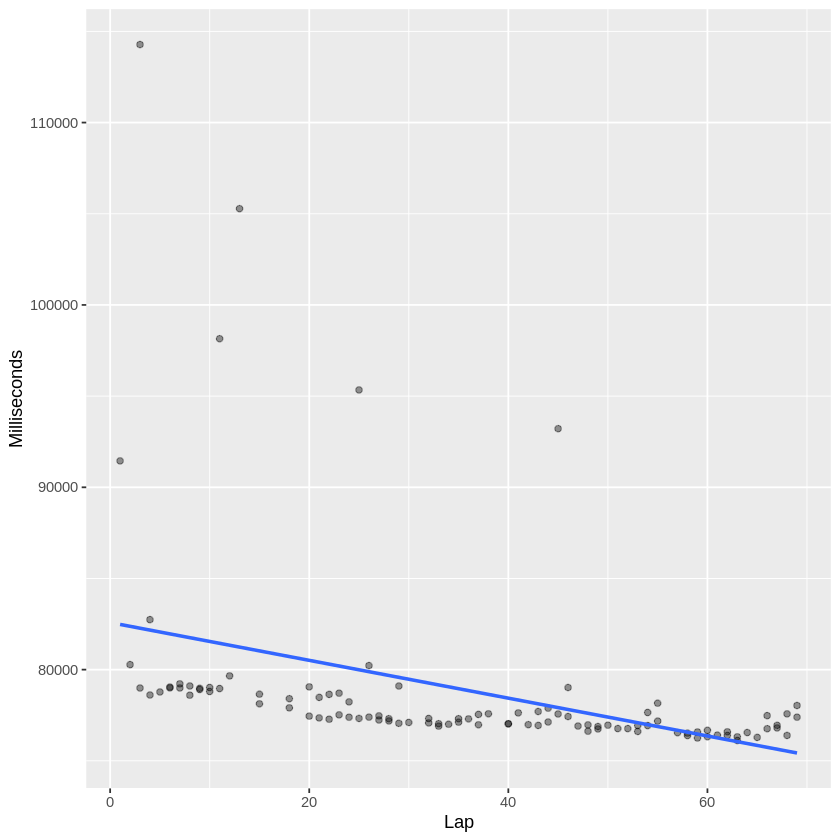

In [45]:
#9. Canada

ls_canada <- str_laps %>%
                filter(raceId %in% canada_race_ID) 

ls_canada_clean <- ls_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_canada_clean
ls_canada_clean_ID <- ls_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_canada_races <- str_laps %>%
                    filter(raceId %in% ls_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
998,52
1019,52
1034,52
1035,52
1061,52
978,50


`geom_smooth()` using formula 'y ~ x'



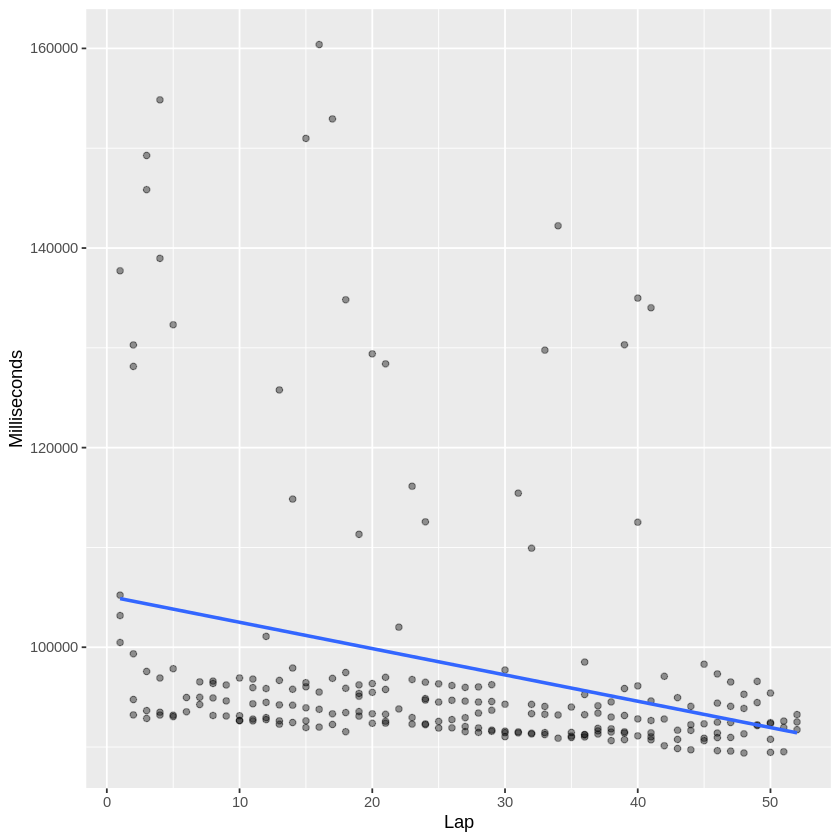

In [46]:
#10. Great Britain

ls_uk <- str_laps %>%
                filter(raceId %in% uk_race_ID) 

ls_uk_clean <- ls_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_uk_clean
ls_uk_clean_ID <- ls_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_uk_races <- str_laps %>%
                    filter(raceId %in% ls_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1032,71
977,70
1018,70
1058,70
1060,70
997,69
1031,20


`geom_smooth()` using formula 'y ~ x'



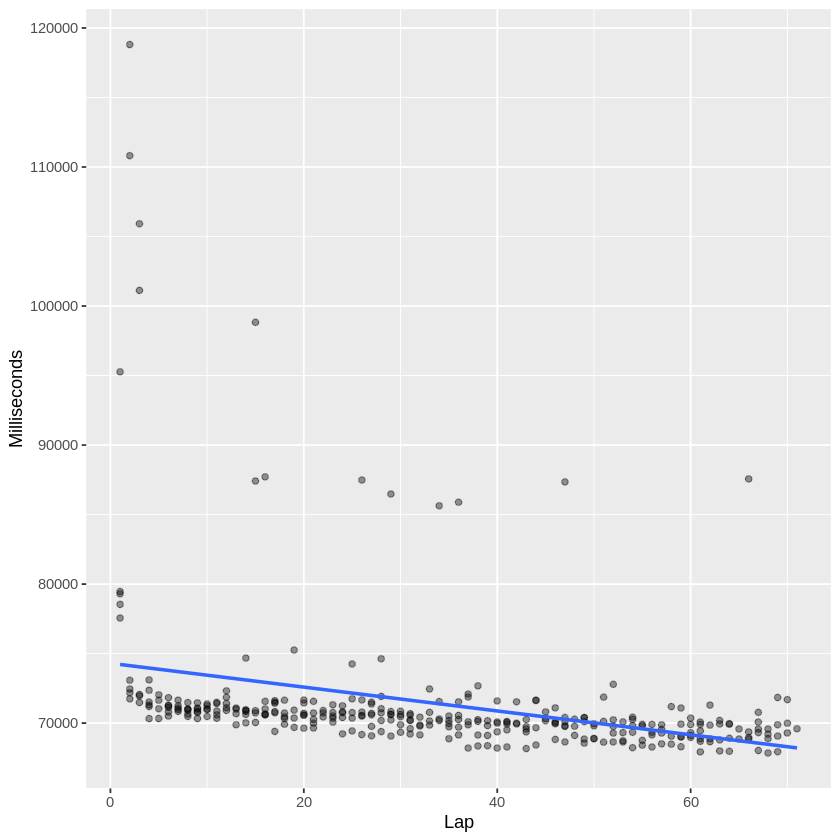

In [47]:
#11. Austria

ls_austria <- str_laps %>%
                filter(raceId %in% austria_race_ID) 

ls_austria_clean <- ls_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_austria_clean
ls_austria_clean_ID <- ls_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_austria_races <- str_laps %>%
                    filter(raceId %in% ls_austria_clean_ID)

formulaone_split <- initial_split(ls_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,53
1017,52
996,48


`geom_smooth()` using formula 'y ~ x'



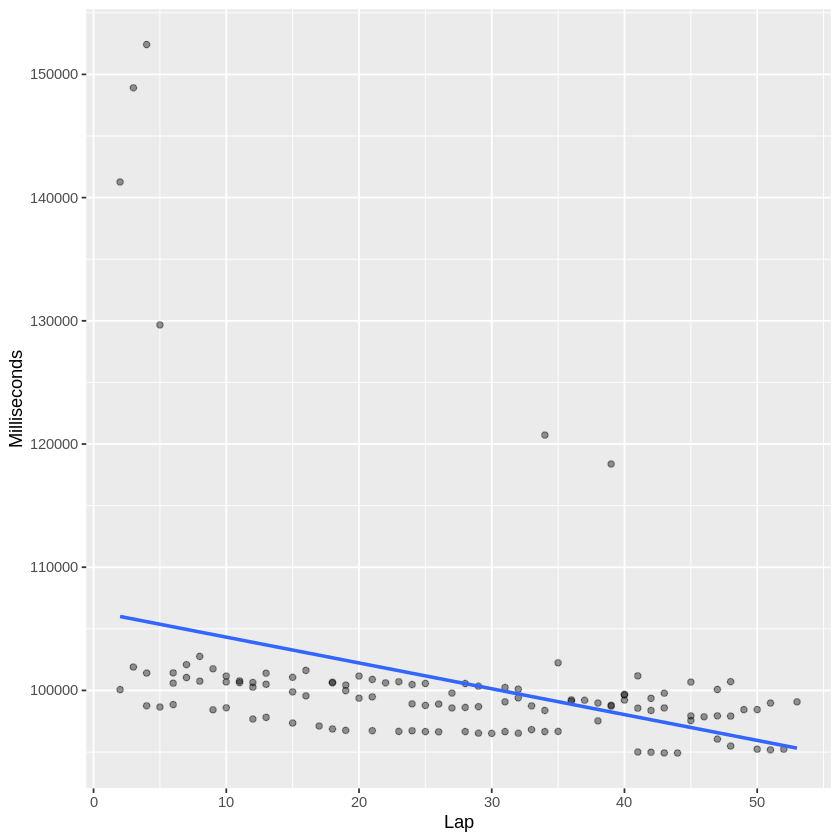

In [48]:
#12. France

ls_france <- str_laps %>%
                filter(raceId %in% france_race_ID) 

ls_france_clean <- ls_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_france_clean
ls_france_clean_ID <- ls_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_france_races <- str_laps %>%
                    filter(raceId %in% ls_france_clean_ID)

formulaone_split <- initial_split(ls_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1033,70
979,69
1000,68
1021,68


`geom_smooth()` using formula 'y ~ x'



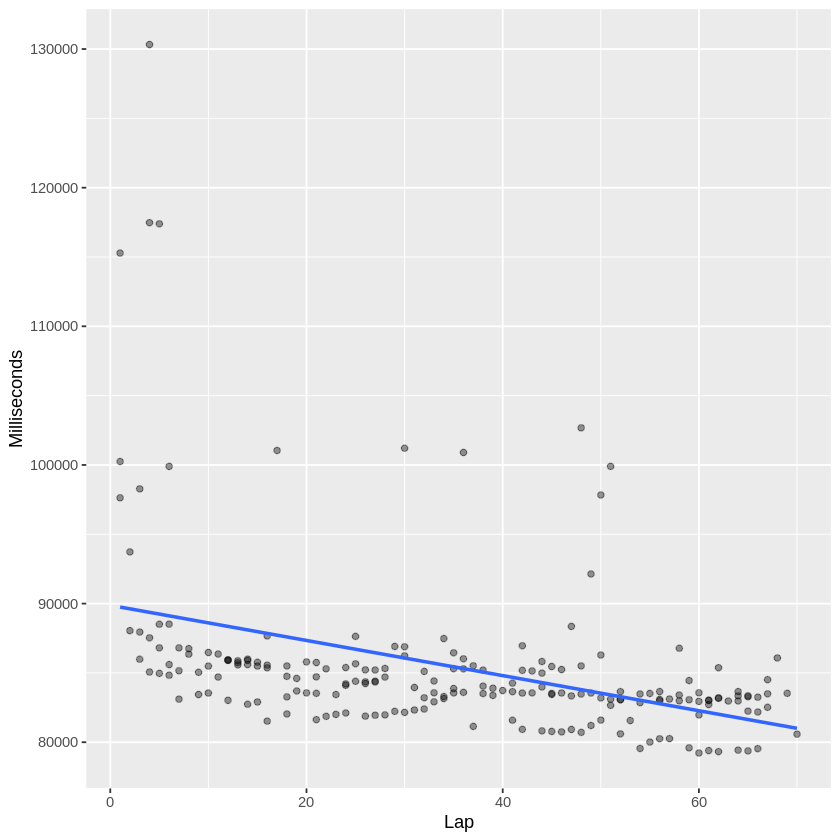

In [49]:
#13. Hungary

ls_hungary <- str_laps %>%
                filter(raceId %in% hungary_race_ID) 

ls_hungary_clean <- ls_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                     
ls_hungary_clean
ls_hungary_clean_ID <- ls_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_hungary_races <- str_laps %>%
                    filter(raceId %in% ls_hungary_clean_ID)

formulaone_split <- initial_split(ls_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
980,44
1022,44
1037,44
1001,43
1063,1


`geom_smooth()` using formula 'y ~ x'



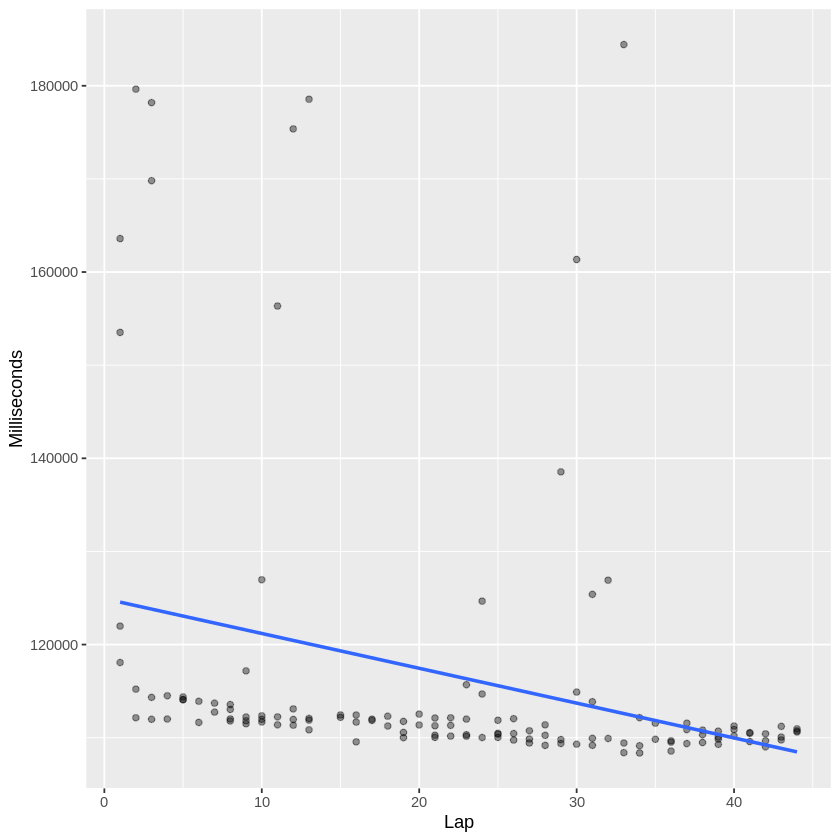

In [50]:
#14. Belgium

ls_belgium <- str_laps %>%
                filter(raceId %in% belgium_race_ID) 

ls_belgium_clean <- ls_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_belgium_clean
ls_belgium_clean_ID <- ls_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_belgium_races <- str_laps %>%
                    filter(raceId %in% ls_belgium_clean_ID)

formulaone_split <- initial_split(ls_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



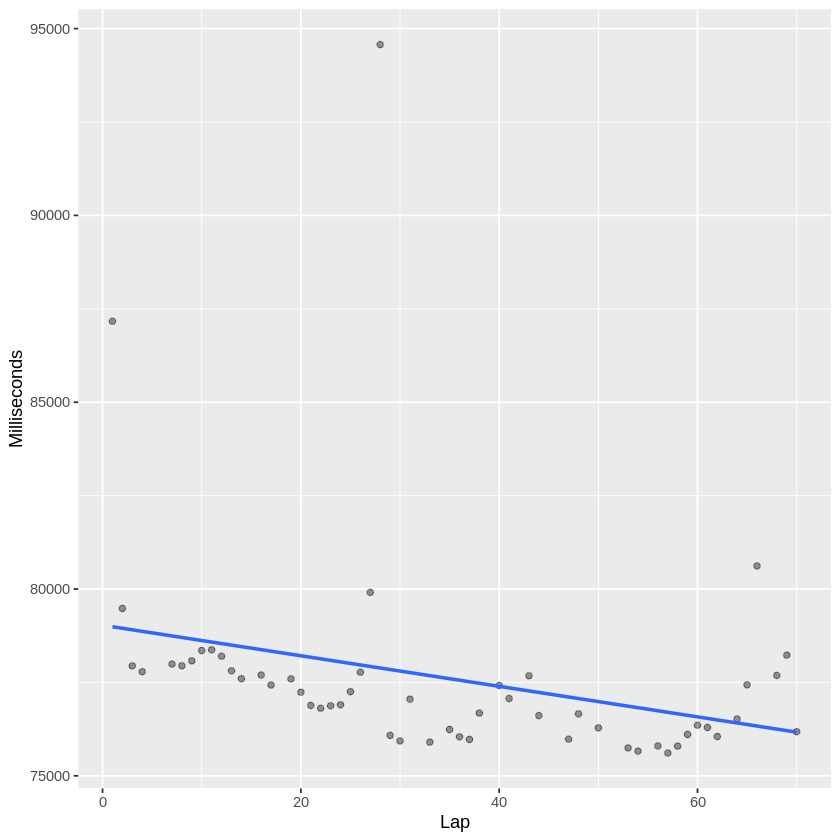

In [51]:
#15. Netherlands

ls_netherlands <- str_laps %>%
                filter(raceId %in% netherlands_race_ID) 

ls_netherlands_clean <- ls_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_netherlands_clean
ls_netherlands_clean_ID <- ls_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_netherlands_races <- str_laps %>%
                    filter(raceId %in% ls_netherlands_clean_ID)

formulaone_split <- initial_split(ls_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
981,53
1038,53
1065,53
1002,52
1023,52


`geom_smooth()` using formula 'y ~ x'



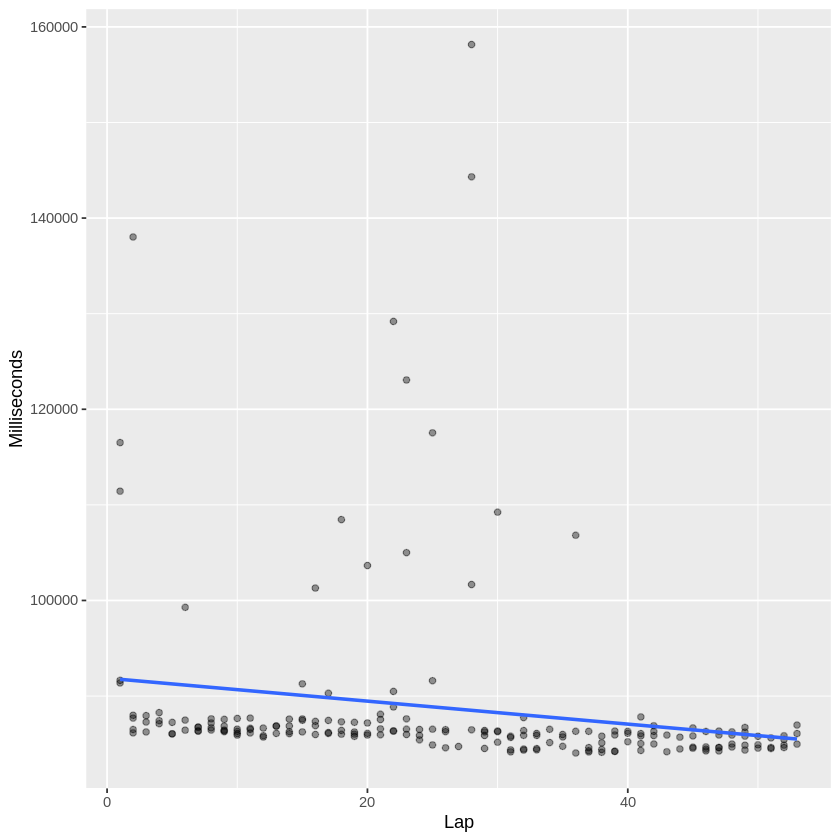

In [52]:
#16. Italy, Monza

ls_monza <- str_laps %>%
                filter(raceId %in% monza_race_ID) 

ls_monza_clean <- ls_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
ls_monza_clean
ls_monza_clean_ID <- ls_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_monza_races <- str_laps %>%
                    filter(raceId %in% ls_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(ls_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,61
1003,60
982,58


`geom_smooth()` using formula 'y ~ x'



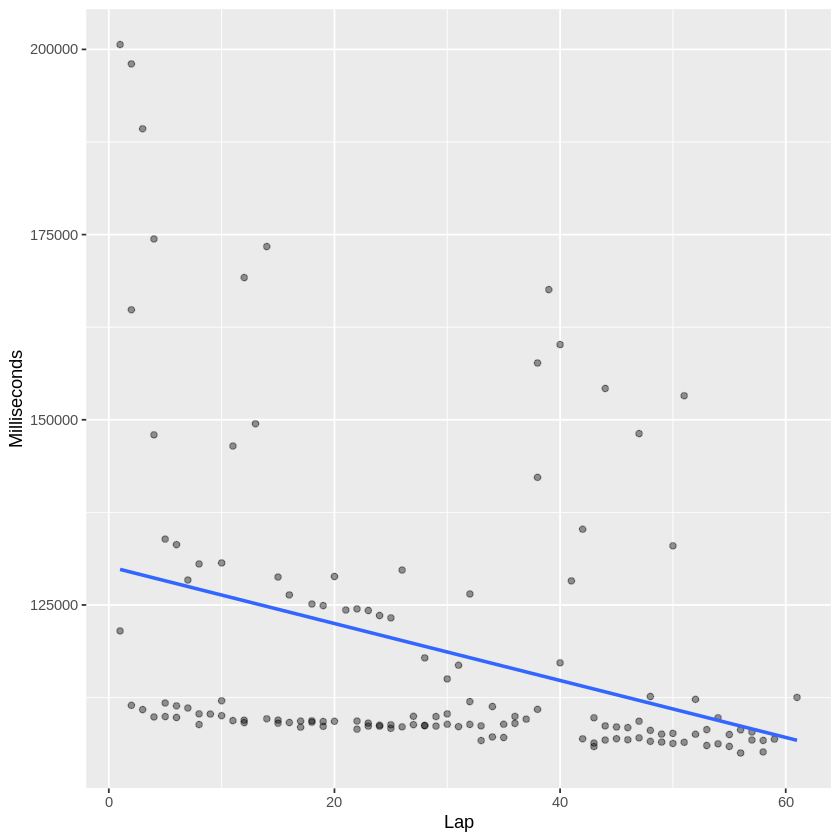

In [53]:
#17. Singapore

ls_singapore <- str_laps %>%
                filter(raceId %in% singapore_race_ID) 

ls_singapore_clean <- ls_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_singapore_clean
ls_singapore_clean_ID <- ls_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_singapore_races <- str_laps %>%
                    filter(raceId %in% ls_singapore_clean_ID)

formulaone_split <- initial_split(ls_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1005,52
1026,51
984,45


`geom_smooth()` using formula 'y ~ x'



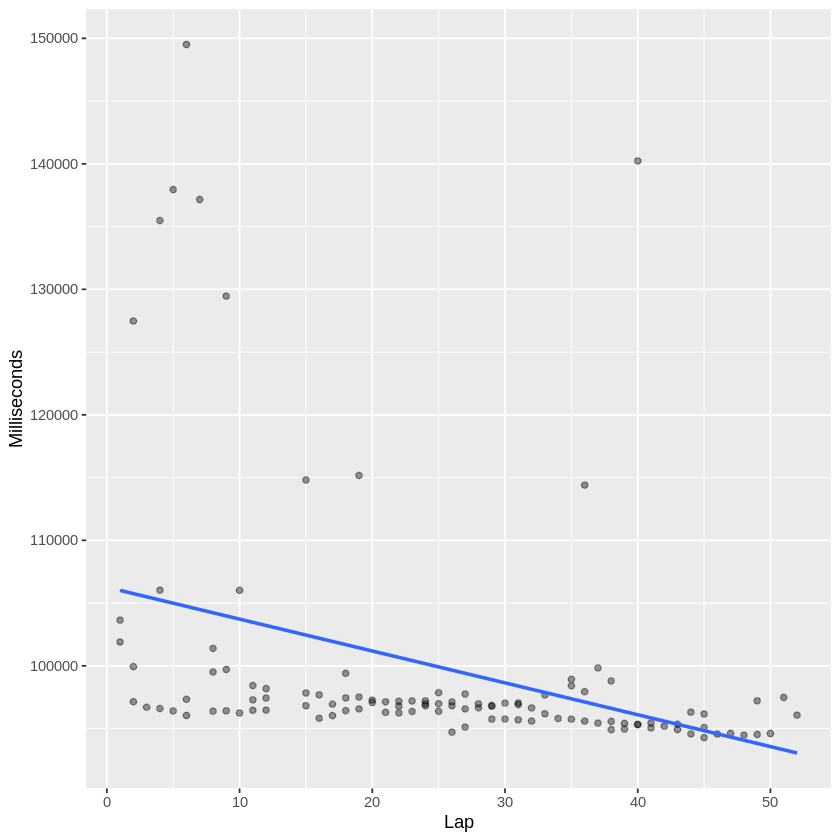

In [54]:
#18. Japan

ls_japan <- str_laps %>%
                filter(raceId %in% japan_race_ID) 

ls_japan_clean <- ls_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_japan_clean
ls_japan_clean_ID <- ls_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_japan_races <- str_laps %>%
                    filter(raceId %in% ls_japan_clean_ID)

formulaone_split <- initial_split(ls_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
985,55
1028,55
1069,55
1006,54


`geom_smooth()` using formula 'y ~ x'



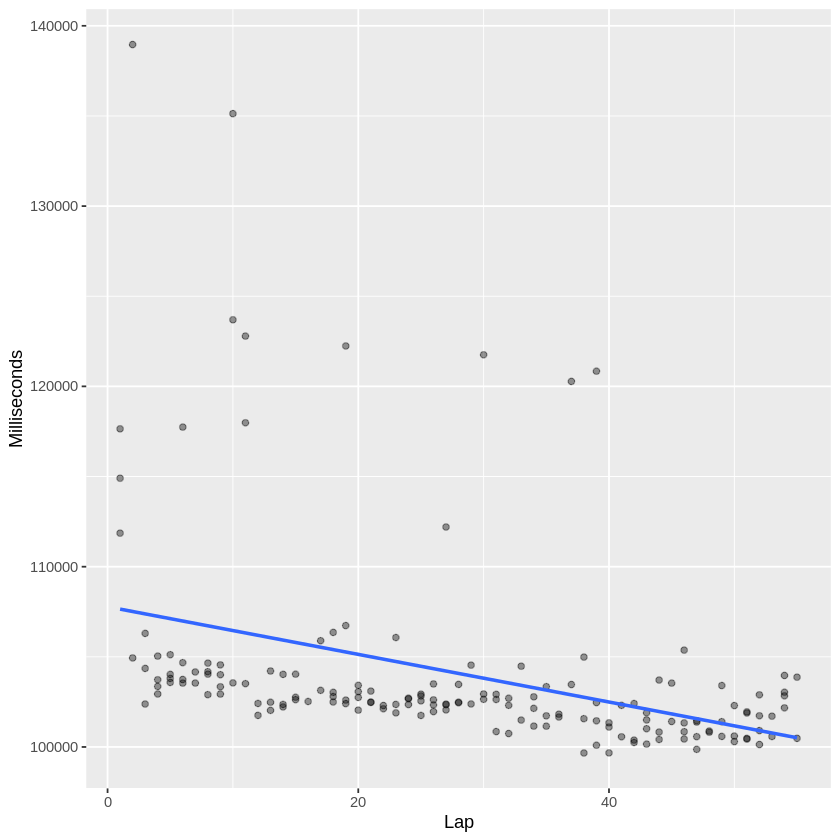

In [55]:
#19. USA, Austin

ls_austin <- str_laps %>%
                filter(raceId %in% austin_race_ID) 

ls_austin_clean <- ls_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_austin_clean
ls_austin_clean_ID <- ls_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_austin_races <- str_laps %>%
                    filter(raceId %in% ls_austin_clean_ID)

formulaone_split <- initial_split(ls_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
986,70
1027,70
1007,69
1070,69


`geom_smooth()` using formula 'y ~ x'



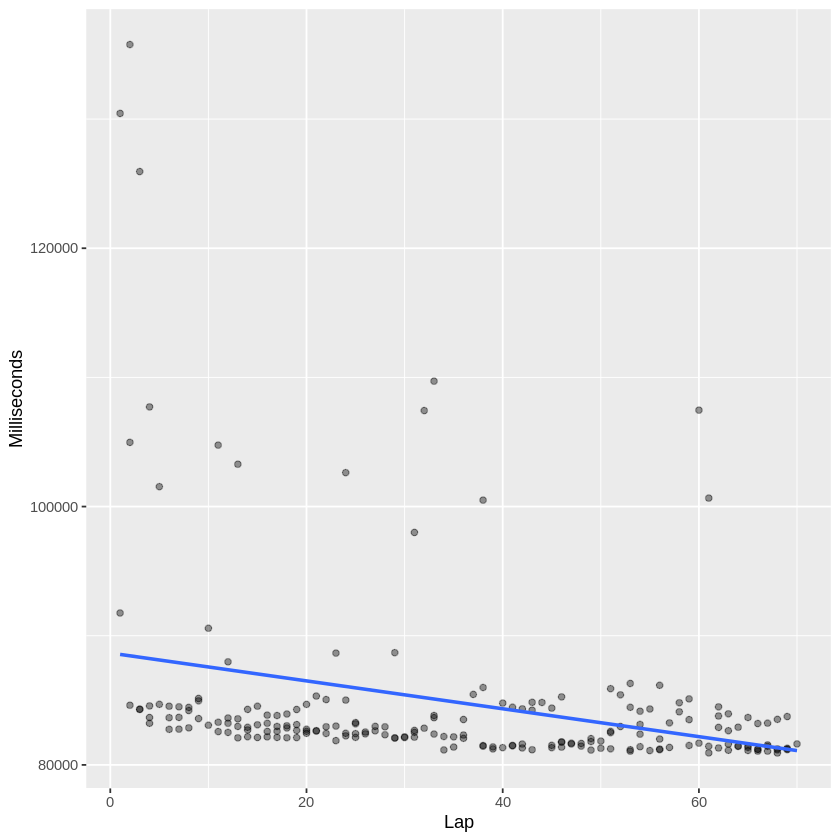

In [56]:
#20. Mexico

ls_mexico <- str_laps %>%
                filter(raceId %in% mexico_race_ID) 

ls_mexico_clean <- ls_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_mexico_clean
ls_mexico_clean_ID <- ls_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_mexico_races <- str_laps %>%
                    filter(raceId %in% ls_mexico_clean_ID)

formulaone_split <- initial_split(ls_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
987,69
1008,69
1029,65
1071,47


`geom_smooth()` using formula 'y ~ x'



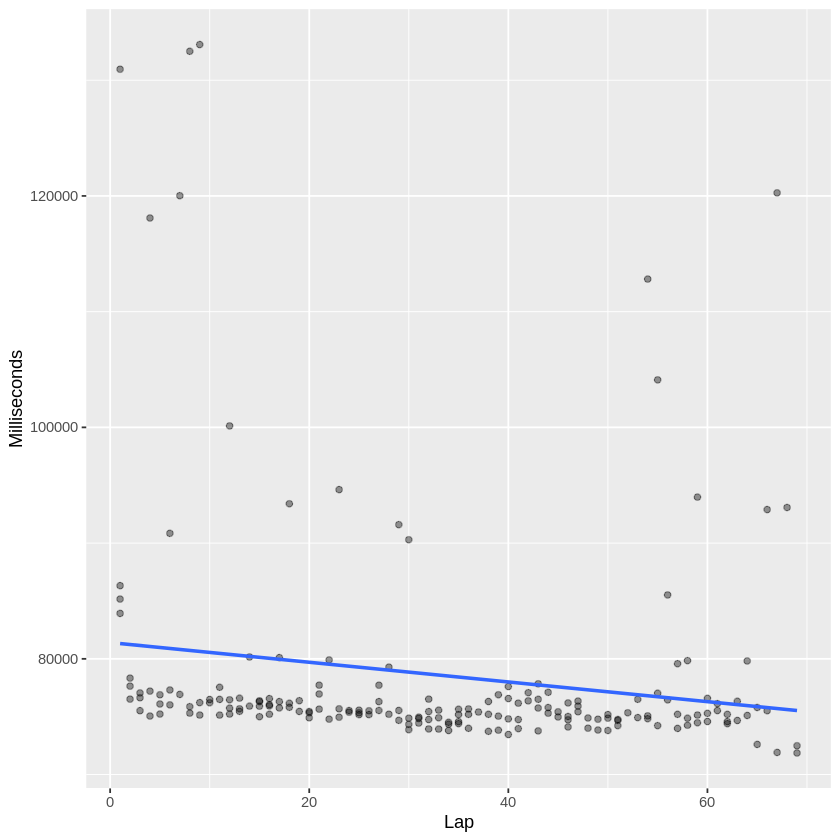

In [57]:
#21. Brazil

ls_brazil <- str_laps %>%
                filter(raceId %in% brazil_race_ID) 

ls_brazil_clean <- ls_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_brazil_clean
ls_brazil_clean_ID <- ls_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_brazil_races <- str_laps %>%
                    filter(raceId %in% ls_brazil_clean_ID)

formulaone_split <- initial_split(ls_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

raceId,n
<dbl>,<int>
1073,57
1047,55
988,54
1009,54
1030,45


`geom_smooth()` using formula 'y ~ x'



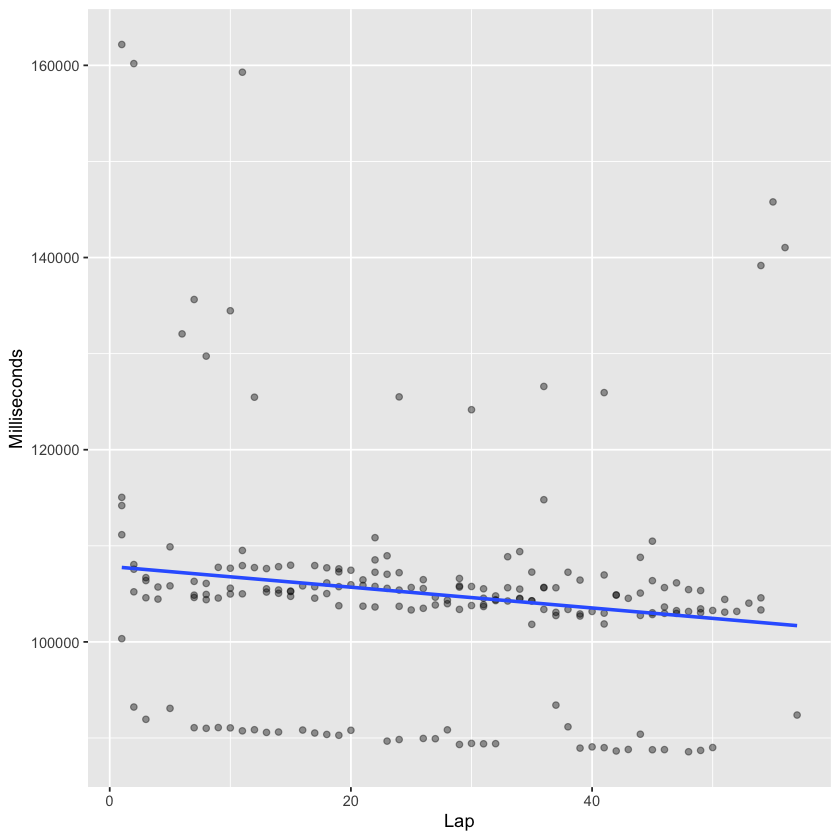

In [8]:
 #22. Abu Dhabi

ls_uae <- str_laps %>%
                filter(raceId %in% uae_race_ID) 

ls_uae_clean <- ls_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
ls_uae_clean
ls_uae_clean_ID <- ls_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

ls_uae_races <- str_laps %>%
                    filter(raceId %in% ls_uae_clean_ID)

formulaone_split <- initial_split(ls_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()